In [1]:
from src.genetic.arbitrage import Arbitrage, Population, Individual, CrossOverEnum
import matplotlib.pyplot as plt
import matplotlib
import pygmo as pg

In [11]:
def plot(x, y, generation):
    
    plt = matplotlib.pyplot

    # Crie um array de valores de 0 a 1 com espaçamento de 0.1
    
    plt.xlim(0, 1.05)
    plt.ylim(0, 1.05)

    # Defina o tamanho da figura (largura x altura) em polegadas
    # largura_figura = 20  # Ajuste a largura
    # altura_figura = 6    # Ajuste a altura
    # plt.figure(figsize=(largura_figura, altura_figura))
    plt.title(f'{generation}° Generation')
    plt.xlabel('Profit')
    plt.ylabel('Dispersation')
    
    plt.scatter(x, y)
    plt.grid(True)
    plt.show()


In [3]:
arbitrages = []
arbitrages.append(Arbitrage("a86e2d9332c3ae6995a042ed4b95fe2b", 59664,	59631, "UNIBET_EU", "ONEXBET",	2.0,	2.02, 0.49))
arbitrages.append(Arbitrage("a86e2d9332c3ae6995a042ed4b95fe2b", 59664,	59655, "UNIBET_EU", "PINNACLE",	2.0,	2.03, 0.73))
arbitrages.append(Arbitrage("45c50eab0a379bd74d9ad5879ee50595", 94745,	94783, "ONEXBET", "UNIBET_EU",	1.9,	2.12, 0.19))
arbitrages.append(Arbitrage("45c50eab0a379bd74d9ad5879ee50595", 94745,	94791, "ONEXBET", "MATCHBOOK",	1.9,	2.14, 0.63))
arbitrages.append(Arbitrage("ff03cc32e860ac5cd4c907381443986f", 94795,	94833, "ONEXBET", "UNIBET_EU",	2.12,	1.91, 0.47))
arbitrages.append(Arbitrage("ff03cc32e860ac5cd4c907381443986f", 94840,	94833, "MATCHBOOK", "UNIBET_EU",	2.12,	1.91, 0.47))
arbitrages.append(Arbitrage("6454621f739da2ded2aaae7694e8835a", 50050,	50043, "ONEXBET", "NORDICBET",	2.08,	1.95, 0.64))
arbitrages.append(Arbitrage("6454621f739da2ded2aaae7694e8835a", 50771,	50764, "ONEXBET", "NORDICBET",	2.08,	1.95, 0.64))
arbitrages.append(Arbitrage("6454621f739da2ded2aaae7694e8835a", 51606,	51599, "ONEXBET", "NORDICBET",	2.08,	1.95, 0.64))
arbitrages.append(Arbitrage("6454621f739da2ded2aaae7694e8835a", 56150,	56143, "ONEXBET", "NORDICBET",	2.08,	1.95, 0.64))
arbitrages.append(Arbitrage("6454621f739da2ded2aaae7694e8835a", 56932,	56925, "ONEXBET", "NORDICBET",	2.08,	1.95, 0.64))
arbitrages.append(Arbitrage("6454621f739da2ded2aaae7694e8835a", 59265,	59258, "ONEXBET", "NORDICBET",	2.08,	1.95, 0.64))

In [4]:
population = Population(arbitrages, 100, CrossOverEnum.ONE_POINT_CROSSOVER, 200)

Mutou
Antes: [(0, 0.33), (1, 0.14), (1, 0.11), (1, 0.13), (1, 0.12), (1, 0.12), (0, 0.46), (1, 0.08), (1, 0.11), (1, 0.11), (0, 0.02), (1, 0.11)] --> [58.019999999999996, 3.206544110648071]
Depois: [(0, 0.33), (1, 0.13), (1, 0.1), (1, 0.12), (1, 0.11), (1, 0.11), (0, 0.46), (1, 0.08), (1, 0.1), (1, 0.1), (1, 0.02), (1, 0.1)] --> [54.88999999999999, 3.1834416465814517]
Mutou
Antes: [(1, 0.15), (1, 0.12), (0, 0.2), (1, 0.11), (1, 0.1), (1, 0.12), (0, 0.46), (1, 0.08), (1, 0.11), (1, 0.11), (0, 0.02), (1, 0.11)] --> [59.61999999999999, 3.1695274404689693]
Depois: [(1, 0.15), (1, 0.12), (0, 0.2), (1, 0.11), (1, 0.1), (1, 0.12), (0, 0.46), (1, 0.08), (1, 0.11), (1, 0.11), (1, 0.02), (1, 0.11)] --> [60.89999999999999, 3.2824045642644637]
Mutou
Antes: [(0, 0.33), (1, 0.17), (0, 0.2), (1, 0.17), (0, 0.08), (1, 0.14), (0, 0.46), (1, 0.11), (1, 0.13), (1, 0.13), (1, 0.02), (1, 0.12)] --> [62.34, 2.8618032679104726]
Depois: [(0, 0.33), (1, 0.21), (0, 0.2), (0, 0.17), (0, 0.08), (1, 0.17), (0, 0.4

In [5]:
import datetime
def get_file_name(geracoes):
    data_e_hora_atual = datetime.datetime.now()
    return f'{data_e_hora_atual.strftime("%Y_%m_%d_[%H:%M:%S]")}_[G:{geracoes}].gif'


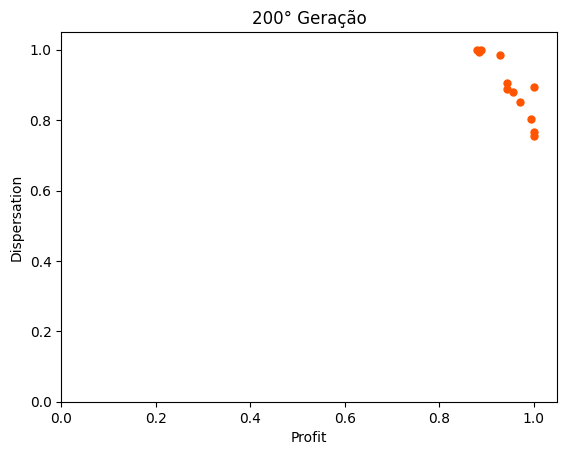

In [6]:
from matplotlib.animation import PillowWriter

metadata = dict(title='NSGA-II', artist='João Geraldo')
writer = PillowWriter(fps=2, metadata=metadata)
fig = plt.figure()
# l, = plt.plot([], [], 'ko', markersize=5, color='lightblue')
l, = plt.plot([], [], 'ko', markersize=5)  # Apenas 'ko' para a cor preta
plt.setp(l, color='#FF5500')  # Cor laranja

plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('Profit')
plt.ylabel('Dispersation')
file_name = get_file_name(population.generations)

with writer.saving(fig, file_name, 100):
    for i in range(len(population.solutions_history)):
        plt.title(f'{i}° Geração')
        l.set_data(population.solutions_history[i][0],[population.solutions_history[i][1]])
        writer.grab_frame()

## Plot da primeira e última geração

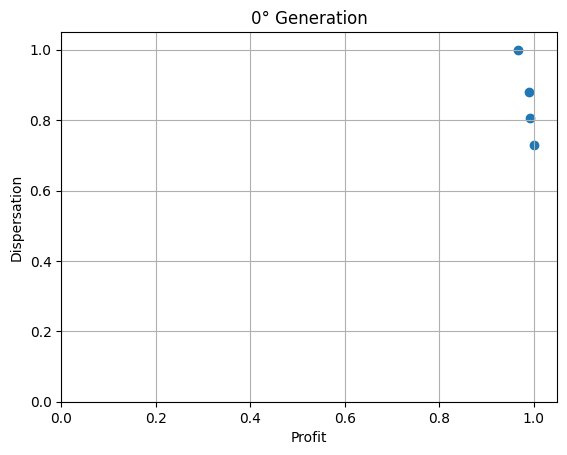

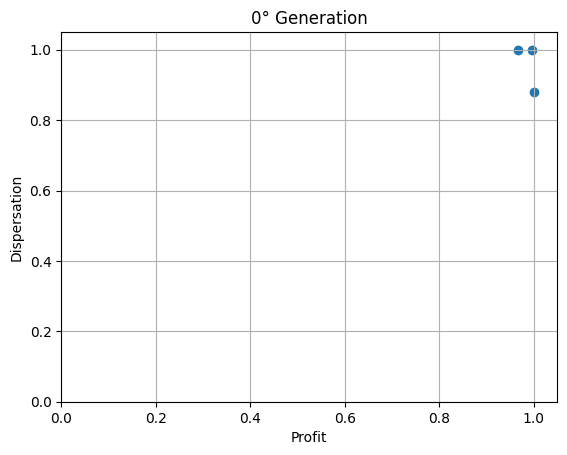

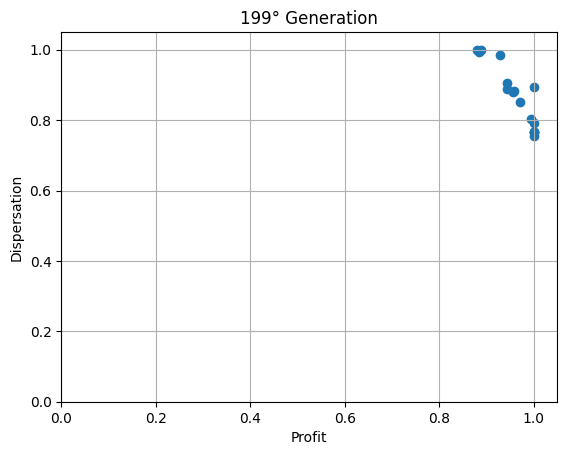

In [12]:
# importante
x_data = []
y_data = []
for generation, front in population.pareto_history_front:
    x = [i.fitness_normalized[0] for i in front]
    y = [i.fitness_normalized[1] for i in front]
    if generation == 0 or generation == population.generations - 1:
        x_data.append(x)
        y_data.append(y)
        plot(x, y, generation)



## Método para gerar plot do Hypervolume x Generation

In [7]:
def plot_hv(x, y, y_axis_limit):
    hv = matplotlib.pyplot
    hv.xlabel('Generation')
    hv.ylabel('Hypervolume')
    hv.xlim(-1, max(x)+2)
    hv.ylim(0, y_axis_limit)
    hv.plot(x, y)
    hv.grid(True)
    hv.show()

## Preparando dados para o plot do Hypervolume x Generation


```
population.pareto_history_front = [(geracao, fronteira_de_pareto), (geracao, fronteira_de_pareto), (geracao, fronteira_de_pareto)]
```


max: 0.025110000000000035  index: 1 generation: 0
max: 39.82477100756665  index: 1 generation: 0
Melhor fronteira --> 17: [[[1.0, 0.7619], [0.9172, 1.0], [0.952, 0.9319], [0.9577, 0.9521], [0.9608, 0.8863], [1.0, 0.7961], [1.0, 0.8618], [0.9789, 0.9005], [0.9707, 0.862], [0.9783, 0.8206], [0.8925, 1.0], [0.9319, 0.9521], [0.9178, 0.9521], [0.879, 1.0], [0.9577, 0.9521], [0.9577, 0.9521], [0.9577, 0.9521]]]  


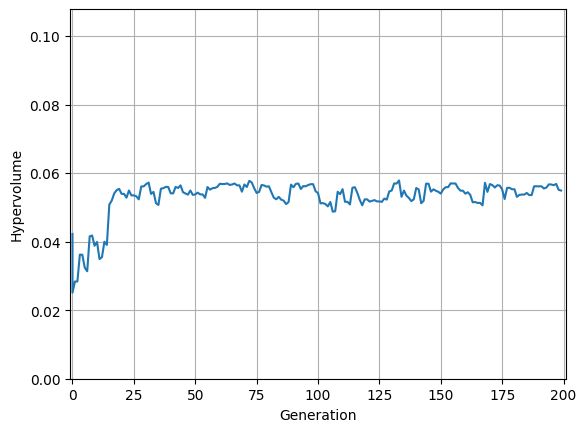

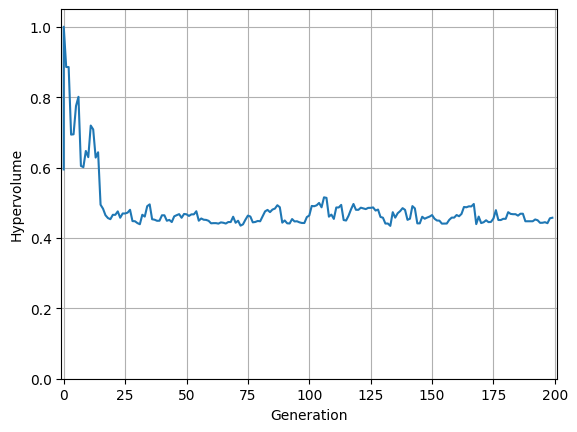

In [8]:
reference_point = [1.1, 1.1]

x_values = [x for x, _ in population.pareto_history_front]
y_values = [pg.hypervolume([individual.fitness_normalized for individual in y]).compute(reference_point) for _, y in population.pareto_history_front]

#######
max_value = min(y_values)
print(f'max: {max_value}  index: {y_values.index(max_value)} generation: {x_values[y_values.index(max_value)]}')
#######

# Invertendo a solução para melhorar a visualização já que é um problema de maximização
y_values_reversed = [1 / pg.hypervolume([individual.fitness_normalized for individual in y]).compute(reference_point) for _, y in population.pareto_history_front]
max_value = max(y_values_reversed)
print(f'max: {max_value}  index: {y_values_reversed.index(max_value)} generation: {x_values[y_values_reversed.index(max_value)]}')
y_values_reversed = [i/max_value for i in y_values_reversed]

best_front = [[individual.fitness_normalized for individual in front] for generation, front in
               population.pareto_history_front if generation == 116]
print(f'Melhor fronteira --> {len(best_front[0])}: {best_front}  ')

plot_hv(x_values, y_values, max(y_values) + 0.05)
plot_hv(x_values, y_values_reversed, max(y_values_reversed) + 0.05)
